In [1]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

In [2]:
# training set과 test set의 모든 이미지 파일에 대해서,
# jpg image header가 포함되지 않은 (jpg의 파일 구조에 어긋나는) 파일들을 삭제해줍니다.

data_path = '/aiffel/aiffel/model-fit/data/30vnfoods/'
train_path = data_path + 'Train/'
val_path = data_path + 'Validate/'
test_path = data_path + 'Test/'

# 잘못된 형식 제외

In [3]:
# for path in [train_path, test_path]:
#     classes = os.listdir(path)

#     for food in classes:
#         food_path = os.path.join(path, food)
#         images = os.listdir(food_path)
        
#         for image in images:
#             with open(os.path.join(food_path, image), 'rb') as f:
#                 bytes = f.read()
#             if bytes[:3] != b'\xff\xd8\xff':
#                 print(os.path.join(food_path, image))
#                 os.remove(os.path.join(food_path, image))

In [4]:
# from struct import unpack
# import tqdm
# import glob as glob

# marker_mapping = {
#     0xffd8: "Start of Image",
#     0xffe0: "Application Default Header",
#     0xffdb: "Quantization Table",
#     0xffc0: "Start of Frame",
#     0xffc4: "Define Huffman Table",
#     0xffda: "Start of Scan",
#     0xffd9: "End of Image"
# }


# class JPEG:
#     def __init__(self, image_file):
#         with open(image_file, 'rb') as f:
#             self.img_data = f.read()
    
#     def decode(self):
#         data = self.img_data
#         while(True):
#             marker, = unpack(">H", data[0:2])
#             # print(marker_mapping.get(marker))
#             if marker == 0xffd8:
#                 data = data[2:]
#             elif marker == 0xffd9:
#                 return
#             elif marker == 0xffda:
#                 data = data[-2:]
#             else:
#                 lenchunk, = unpack(">H", data[2:4])
#                 data = data[2+lenchunk:]            
#             if len(data)==0:
#                 break        


# bads = []

# for img in glob.glob(os.path.join(data_path, '*/*/*')):
#     image = JPEG(img) 
#     try:
#         image.decode()   
#     except:
#         bads.append(img)

# print(bads)

In [5]:
# for bad in bads:
#     os.remove(bad)

In [3]:
import os
import random

cls = [os.path.join(train_path, x) for x in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, x))]
cls

['/aiffel/aiffel/model-fit/data/30vnfoods/Train/Banh khot',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Bun rieu',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Pho',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Banh mi',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Banh cuon',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Com tam',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Bun bo Hue',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Chao long',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Bun dau mam tom',
 '/aiffel/aiffel/model-fit/data/30vnfoods/Train/Banh xeo']

In [4]:
cls_files = {}

for x in cls:
    if x not in cls_files:
        cls_files[x] = [f for f in os.listdir(x) if os.path.isfile(os.path.join(x, f))]
        
#cls_files

# Val data 생성

In [5]:
# import random
# import copy
# import shutil

# cls_val = {}
# # 0.8, 0.2 비율로 기존의 TRAIN 셋을 나눠봅시다.
# for x in cls:
#     n_train_data = int(len(cls_files[x]) * 0.8) # train 비율 0.8
#     n_val_data = len(cls_files[x]) - n_train_data # validation 비율 0.2
#     print(len(cls_files[x]), n_train_data, n_val_data)
#     train_data = random.sample(cls_files[x], n_train_data)
#     val_data = copy.deepcopy(cls_files[x]) 
    
#     for y in train_data: # TRAIN 폴더에서 VAL 폴더로 옮겨줄 데이터만 남기기
#         val_data.remove(y)
        
#     print(len(cls_files[x]), len(train_data), len(val_data))
    
#     # 현재 클래스 디렉토리 생성
#     x_cls = os.path.join(val_path, x.split('/')[-1])
#     os.makedirs(x_cls, exist_ok=True)
#     for y in val_data:
#         shutil.move(os.path.join(x, y), os.path.join(x_cls, y))
# #         print(os.path.join(x, y), os.path.join(x_cls, y))

In [6]:
def get_num_data(path):
    classes = os.listdir(path)
    length = 0

    for food in classes:
        food_path = os.path.join(path, food)
        images = os.listdir(food_path)
        length += len(images)

    return str(length)

In [7]:
print('training data의 개수: ',get_num_data(train_path))
print('val data의 개수: '+get_num_data(val_path))
print('test data의 개수: '+get_num_data(test_path))

training data의 개수:  7805
val data의 개수: 1955
test data의 개수: 1084


In [8]:
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


def process_path(file_path, class_names, img_shape=(224, 224)):
    '''
    file_path로부터 class label을 만들고, 이미지를 읽는 함수
    '''
    label = tf.strings.split(file_path, os.path.sep)
    label = label[-2] == class_names

    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, img_shape)
    return img, label

def prepare_for_training(ds, batch_size=32, cache=True, shuffle_buffer_size=1000):
    '''
    TensorFlow Data API를 이용해 data batch를 만드는 함수
    '''
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return ds

def load_data(data_path, img_shape, batch_size=32, is_train=True):
    '''
    데이터를 만들기 위해 필요한 함수들을 호출하고 데이터를 리턴해주는 함수
    '''
    class_names = [cls for cls in os.listdir(data_path) if cls != '.DS_Store']
    data_path = pathlib.Path(data_path)

    list_ds = tf.data.Dataset.list_files(str(data_path/'*/*'))
    labeled_ds = list_ds.map(lambda x: process_path(x, class_names, img_shape=(224, 224)))
    ds = prepare_for_training(labeled_ds, batch_size=batch_size)
    DATASET_SIZE = tf.data.experimental.cardinality(list_ds).numpy()

    return ds, DATASET_SIZE

def show_batch(image_batch, label_batch, class_names):
    size = len(image_batch)
    sub_size = int(size ** 0.5) + 1

    plt.figure(figsize=(10, 10), dpi=80)
    for n in range(size):
        plt.subplot(sub_size, sub_size, n+1)
        plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
        plt.title(class_names[np.array(label_batch[n])==True][0].title())
        plt.imshow(image_batch[n])
    plt.show()
def load_label(data_path):
    '''
    class 이름을 가져오는 함수
    '''
    class_names = [str(x).split('/')[-1] for x in data_path.iterdir()]
    print('Find {} class : {}'.format(len(class_names), class_names))
    return np.array(class_names)

In [9]:
train_data_path = data_path +'/Train'
train_dataset,_ = load_data(train_data_path, img_shape=(224,224),batch_size=10)
data_dir = pathlib.Path(train_data_path)
class_names = load_label(data_dir)

Find 10 class : ['Banh khot', 'Bun rieu', 'Pho', 'Banh mi', 'Banh cuon', 'Com tam', 'Bun bo Hue', 'Chao long', 'Bun dau mam tom', 'Banh xeo']


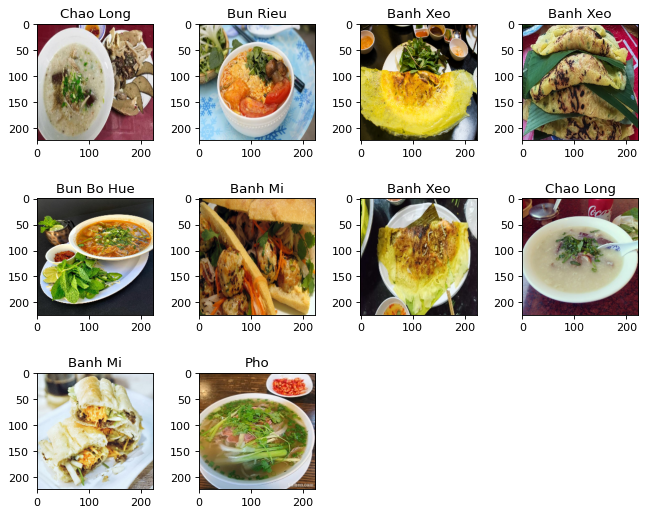

In [10]:
for img, label in train_dataset.take(1):
    show_batch(img, label, class_names)

# 모델 : EfficientNet

In [11]:
from tensorflow.keras.applications import EfficientNetB0

class myModel(tf.keras.Model):
    '''
    EfficientNetB0을 백본으로 사용하는 모델을 구성합니다.
    Classification 문제로 접근할 것이기 때문에 맨 마지막 Dense 레이어에 
    우리가 원하는 클래스 갯수 만큼을 지정해주어야 합니다.
    '''
    def __init__(self, num_classes=10, freeze=False):
        super(myModel, self).__init__()
        self.base_model = EfficientNetB0(include_top=False, weights='imagenet')
        if freeze:
            self.base_model.trainable = False
        for layer in self.base_model.layers[-2:]:
            layer.trainable = True
        self.top = tf.keras.Sequential([tf.keras.layers.GlobalAveragePooling2D(name="avg_pool"),
                                       tf.keras.layers.BatchNormalization(),
                                       tf.keras.layers.Dropout(0.5, name="top_dropout")])
        self.classifier = tf.keras.layers.Dense(num_classes, activation="softmax", name="pred")
    def call(self, inputs, training=True):
        x = self.base_model(inputs)
        x = self.top(x)
        x = self.classifier(x)
        return x

if __name__ == '__main__':
    model = myModel(num_classes=10, freeze=True)
    model.build(input_shape=(None, 224, 224, 3))
    print(model.summary())

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
sequential (Sequential)      (None, 1280)              5120      
_________________________________________________________________
pred (Dense)                 multiple                  12810     
Total params: 4,067,501
Trainable params: 15,370
Non-trainable params: 4,052,131
_________________________________________________________________
None


In [12]:
from tensorflow.keras.utils import Progbar

class Trainer:
    def __init__(self, model, epochs, batch, loss_fn, optimizer):
        self.model = model
        self.epochs = epochs
        self.batch = batch
        self.loss_fn = loss_fn
        self.optimizer = optimizer

    def compute_acc(self, y_pred, y):
        correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
        return accuracy

    @tf.function
    def train_on_batch(self, x_batch_train, y_batch_train):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)    # 모델이 예측한 결과
            train_loss = self.loss_fn(y_batch_train, logits)     # 모델이 예측한 결과와 GT를 이용한 loss 계산

        grads = tape.gradient(train_loss, model.trainable_weights)  # gradient 계산
        self.optimizer.apply_gradients(zip(grads, model.trainable_weights))  # Otimizer에게 처리된 그라데이션 적용을 요청

        return train_loss, logits

    def train(self, train_dataset, acc_metric, steps_per_epoch, val_dataset, val_step, checkpoint_manager):
        metrics_names = ['train_loss', 'train_acc', 'val_loss']
        best_loss = 100
        for epoch in range(self.epochs):
            print("\nEpoch {}/{}".format(epoch+1, self.epochs))

            train_dataset = train_dataset.shuffle(100)
            val_dataset = val_dataset.shuffle(100)

            train_dataset = train_dataset.take(steps_per_epoch)
            val_dataset = val_dataset.take(val_step)

            progBar = Progbar(steps_per_epoch * self.batch, stateful_metrics=metrics_names)

            train_loss, val_loss = 100, 100

            # 데이터 집합의 배치에 대해 반복합니다
            for step_train, (x_batch_train, y_batch_train) in enumerate(train_dataset):
                train_loss, logits = self.train_on_batch(x_batch_train, y_batch_train)

                # train metric(mean, auc, accuracy 등) 업데이트
                acc_metric.update_state(y_batch_train, logits)

                train_acc = self.compute_acc(logits, y_batch_train)
                values = [('train_loss', train_loss), ('train_acc', train_acc)]
                # print('{}'.format((step_train + 1) * self.batch))
                progBar.update((step_train + 1) * self.batch, values=values)
                
            val_loss_list = []
            val_acc_list = []
            for step, (x_batch_val, y_batch_val) in enumerate(val_dataset):
                logits = model(x_batch_val, training=False)
                val_loss = self.loss_fn(y_batch_val, logits)
                val_acc = self.compute_acc(logits, y_batch_val)
                #values = [('train_loss', train_loss), ('train_acc', train_acc), ('val_loss', val_loss), ('val_acc', val_acc)]
                val_loss_list.append(val_loss.numpy())
                val_acc_list.append(val_acc.numpy())
            mean_val_loss = sum(val_loss_list) / len(val_loss_list)
            mean_val_acc = sum(val_acc_list) / len(val_acc_list)
            values = [('train_loss', train_loss), ('train_acc', train_acc), ('val_loss', mean_val_loss), ('val_acc', mean_val_acc)]

            progBar.update((step_train + 1) * self.batch, values=values, finalize=True)
            
            #if val_loss < best_loss:
            if mean_val_loss < best_loss:
                best_loss = val_loss
                print("\nSave better model")
                print(checkpoint_manager.save())

In [13]:
batch_size = 4
train_ds, TRAIN_SIZE = load_data(data_path=train_path, img_shape=(224, 224), batch_size=batch_size)
val_ds, VAL_SIZE = load_data(data_path=val_path,img_shape=(224, 224), batch_size=batch_size)

compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
steps_per_epoch = compute_steps_per_epoch(TRAIN_SIZE)
val_steps = compute_steps_per_epoch(VAL_SIZE)

print(steps_per_epoch)
print(val_steps)

1952
489


In [14]:
loss_function = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.3)
acc_metric = tf.keras.metrics.CategoricalAccuracy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model = myModel(num_classes=10)
checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
manager = tf.train.CheckpointManager(checkpoint, directory=".", max_to_keep=5)

trainer = Trainer(model=model,
                  epochs=10,
                  batch=batch_size,
                  loss_fn=loss_function,
                  optimizer=optimizer,)

trainer.train(train_dataset=train_ds,
            steps_per_epoch=steps_per_epoch,
            val_step=val_steps,
            val_dataset=val_ds,
            acc_metric=acc_metric,
            checkpoint_manager=manager)


Epoch 1/10
7808/7808 [==============================] - 248s 32ms/step - train_loss: 1.9956 - train_acc: 0.2500 - val_loss: 3.0029 - val_acc: 0.0000e+00

Save better model
./ckpt-1

Epoch 2/10
7808/7808 [==============================] - 172s 22ms/step - train_loss: 1.8297 - train_acc: 0.5000 - val_loss: 2.8911 - val_acc: 0.2500

Save better model
./ckpt-2

Epoch 3/10
7808/7808 [==============================] - 175s 22ms/step - train_loss: 2.6640 - train_acc: 0.0000e+00 - val_loss: 2.5090 - val_acc: 0.0000e+00

Save better model
./ckpt-3

Epoch 4/10
6584/7808 [========================>.....] - ETA: 20s - train_loss: 1.8219 - train_acc: 0.7500     A: 2:27 - tr - ETA: 2:14 - train_loss: 1.4225 - train_acc: 1 - ETA: 2:13 - train_loss: 1.7837 - train_acc: 0.7 - ETA: 2:12 - train_loss: 1.987 - ETA: 2:04 - train_loss: 2.4985 - tr - ETA: 2:03 - train_loss: 1.5158 - train_acc: - ETA: 2:02 - train_loss: 1.5 - ETA: 2:00 - train_loss: 1.3 - ETA: 1:59 - train_loss: 2.2776 - ETA: 1:48 - train_los

KeyboardInterrupt: 

In [15]:
num_classes = 10
epoch = 1 
batch_size = 16
img_size = 224

checkpoint_path = './checkpoints/'

model = myModel(num_classes=num_classes)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

test, TEST_SIZE = load_data(data_path=test_path, img_shape=(img_size, img_size), batch_size=batch_size, is_train=False)

checkpoint = tf.train.Checkpoint(optimizer=optimizer, model=model)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_path))

for step_train, (x_batch_train, y_batch_train) in enumerate(test.take(10)):
    #print(model(x_batch_train))
    prediction = model(x_batch_train)
    #print(tf.argmax(y_batch_train, axis=1))
    #print(tf.argmax(prediction, axis=1))
    #print(tf.equal(tf.argmax(y_batch_train, axis=1), tf.argmax(prediction, axis=1)))
    print("{}/{}".format(np.array(tf.equal(tf.argmax(y_batch_train, axis=1), tf.argmax(prediction, axis=1))).sum(), tf.argmax(y_batch_train, axis=1).shape[0]))
    #print("Prediction: {}".format(tf.argmax(prediction, axis=1)))

1/16
2/16
3/16
3/16
3/16
1/16
3/16
1/16
2/16
2/16
